In [1]:
import pandas as pd
import ast # import abstract syntax tree. it will helps the data into real python objects
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
import datetime
import sklearn
import joblib
import pickle

In [2]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/bangalore_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/bangalore_structured.csv"


In [3]:
df=pd.read_excel(input_data)

In [4]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [5]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened dadfbta into a single DataFrame
bangalore_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
bangalore_structured["City"] = "Bangalore"

# Save the dataframe to a csv file
bangalore_structured.to_csv(output_data, index=False)

print(bangalore_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [6]:
bangalore_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_value,commonIcon,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,235-litres,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,,Seats,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,5,,Seats,5,Cargo Volumn,242-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,4,,Seats,5,Cargo Volumn,407-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,5,,Seats,5,Cargo Volumn,353-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore


In [7]:
# Chennai

In [8]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/chennai_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/chennai_structured.csv"


In [9]:
df=pd.read_excel(input_data)

In [10]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
Chennai_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
Chennai_structured["City"] = "Chennai"

# Save the dataframe to a csv file
Chennai_structured.to_csv(output_data, index=False)

print(Chennai_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

In [11]:
Chennai_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_0_list_12_key,data_0_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Chennai
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,Seats,5,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Chennai
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,Seats,5,Cargo Volumn,354-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Chennai


In [12]:
#delhi

In [13]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/delhi_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/delhi_structured.csv"


In [14]:
df=pd.read_excel(input_data)

In [15]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
delhi_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
delhi_structured["City"] = "Delhi"

# Save the dataframe to a csv file
delhi_structured.to_csv(output_data, index=False)

print(delhi_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

In [16]:
delhi_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_1_list_8_key,data_1_list_8_value,data_1_list_9_key,data_1_list_9_value,data_1_list_10_key,data_1_list_10_value,data_1_list_11_key,data_1_list_11_value,car_links,City
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Delhi
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Delhi
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Delhi


In [17]:
# Hyderabad

In [18]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/hyderabad_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/hyderabad_structured.csv"


In [19]:
df=pd.read_excel(input_data)

In [20]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
hyderabad_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
hyderabad_structured["City"] = "Hyderabad"

# Save the dataframe to a csv file
hyderabad_structured.to_csv(output_data, index=False)

print(hyderabad_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

In [21]:
hyderabad_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_10_value,commonIcon,data_2_list_11_key,data_2_list_11_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,280,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,5,,Cargo Volumn,215-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Hyderabad
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,16,,No Door Numbers,5,Cargo Volumn,339-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Hyderabad
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Hyderabad


In [22]:
# jaipur

In [23]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/jaipur_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/jaipur_structured.csv"


In [24]:
df=pd.read_excel(input_data)

In [25]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
jaipur_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
jaipur_structured["City"] = "jaipur"

# Save the dataframe to a csv file
jaipur_structured.to_csv(output_data, index=False)

print(jaipur_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

In [26]:
jaipur_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_1_list_8_key,data_1_list_8_value,data_1_list_9_key,data_1_list_9_value,data_1_list_10_key,data_1_list_10_value,data_1_list_11_key,data_1_list_11_value,car_links,City
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,jaipur
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,jaipur
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,jaipur


In [27]:
# kolkata

In [28]:
# Load your Excel file
input_data = "C:/Users/SG_LENOVO/Downloads/kolkata_cars.xlsx"
output_data = "C:/Users/SG_LENOVO/Downloads/kolkata_structured.csv"


In [57]:
df=pd.read_excel(input_data)

In [58]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
kolkata_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
kolkata_structured["City"] = "kolkata"

# Save the dataframe to a csv file
kolkata_structured.to_csv(output_data, index=False)

print(kolkata_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [59]:
kolkata_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_key,data_2_list_11_value,data_2_list_12_key,data_2_list_12_value,data_0_list_12_key,data_0_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,kolkata
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Cargo Volumn,295 Lit,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,kolkata
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,No Door Numbers,5,Cargo Volumn,460-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata


In [60]:
# combining all structured data

file_paths =["C:/Users/SG_LENOVO/Downloads/bangalore_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/chennai_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/delhi_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/hyderabad_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/jaipur_structured.csv",
            "C:/Users/SG_LENOVO/Downloads/kolkata_structured.csv"]

# Read each CSV file into a DataFrame and store it in a list
final_dfc= []

for file_path in file_paths:
    df=pd.read_csv(file_path)
    final_dfc.append(df)

final_dfc = pd.concat(final_dfc, ignore_index=True)


# Define the output path
output_data = "C:/Users/SG_LENOVO/Downloads/final_dfc.csv"

# Save the combined DataFrame to a CSV file
final_dfc.to_csv(output_data, index=False)

print("sucessfully")

sucessfully


# Pre Process

In [66]:
final_dfc=pd.read_csv("C:/Users/SG_LENOVO/Downloads/final_dfc.csv")

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2096818646.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  final_dfc=pd.read_csv("C:/Users/SG_LENOVO/Downloads/final_dfc.csv")


In [67]:
final_dfc

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
(final_dfc.isnull().sum()/(len(final_dfc)))*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [70]:
threshold=len(final_dfc) *0.5   # droping morethan50% null value in column
final_dfc=final_dfc.dropna(thresh=threshold, axis =1)

In [74]:
final_dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 215 entries, it to City
dtypes: float64(2), int64(4), object(209)
memory usage: 13.7+ MB


In [76]:
final_dfc.shape

(8369, 215)

In [78]:
final_dfc.duplicated().sum()

0

In [80]:
for col in final_dfc.columns:
    print('unique values of  ' + col)
    print(final_dfc[col].unique)
    print("=====================")

unique values of  it
<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
8364    0
8365    0
8366    0
8367    0
8368    0
Name: it, Length: 8369, dtype: int64>
unique values of  ft
<bound method Series.unique of 0       Petrol
1       Petrol
2       Petrol
3       Petrol
4       Diesel
         ...  
8364    Petrol
8365    Petrol
8366    Petrol
8367    Petrol
8368    Diesel
Name: ft, Length: 8369, dtype: object>
unique values of  bt
<bound method Series.unique of 0       Hatchback
1             SUV
2       Hatchback
3           Sedan
4             SUV
          ...    
8364    Hatchback
8365    Hatchback
8366        Sedan
8367    Hatchback
8368          SUV
Name: bt, Length: 8369, dtype: object>
unique values of  km
<bound method Series.unique of 0       1,20,000
1         32,706
2         11,949
3         17,794
4         60,000
          ...   
8364      10,000
8365    1,20,000
8366      50,000
8367      40,000
8368    1,20,000
Name: km, Length

In [82]:
def get_model_name(model):
    model=model.split(' ')[0]
    return model.strip()

In [84]:
get_model_name('Maruti Celerio')

'Maruti'

In [86]:
final_dfc['model']=final_dfc['model'].apply(get_model_name)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2227124009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['model']=final_dfc['model'].apply(get_model_name)


In [88]:
final_dfc['model'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land', 'Chevrolet', 'Citroen',
       'OpelCorsa', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan',
       'Ambassador'], dtype=object)

In [90]:
print('Unique elements in model are',final_dfc['model'].unique())
final_dfc['model'].unique()

Unique elements in model are ['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Mercedes-Benz' 'BMW' 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mitsubishi' 'Jaguar' 'Land'
 'Chevrolet' 'Citroen' 'OpelCorsa' 'Isuzu' 'Lexus' 'Porsche' 'Hindustan'
 'Ambassador']


array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land', 'Chevrolet', 'Citroen',
       'OpelCorsa', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan',
       'Ambassador'], dtype=object)

In [ ]:
list(final_dfc.columns)

In [92]:
def car_mileage(mileage):
    try:
        mileage_s=str(mileage).replace("kmpl", "").replace("km/mg", "").strip()
        mileage_float=float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [94]:
final_dfc['Mileage']=final_dfc["top_0_value.2"].apply(car_mileage)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2712001234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['Mileage']=final_dfc["top_0_value.2"].apply(car_mileage)


In [ ]:
print('Unique elements in mileage are',final_dfc['Mileage'].unique())
final_dfc['Mileage'].unique()

In [107]:
def convert_price(price):
    # Remove the curPrice2rency symbol and commas
    price = re.sub(r'[₹,]', '', price).strip()
    
    if 'Crore' in price:
        price = price.replace('Crore', '').strip()
        return float(price) * 10000000  # Convert to the base unit (e.g., rupees
    elif 'Lakh' in price:
        price = price.replace('Lakh', '').strip()
        return float(price) * 100000  # Convert to the base unit (e.g., rupees)
    elif 'Thousand' in price:
        price = price.replace('Thousand', '').strip()
        return float(price) * 1000  # Convert to the base unit (e.g., rupees)
    else:
        return float(price)  # Assume it's already in the base unit (e.g., rupees)


In [109]:

# Apply the conversion function to the 'price' column
final_dfc['price'] = final_dfc['price'].apply(convert_price)
final_dfc.head(1)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\3719876754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['price'] = final_dfc['price'].apply(convert_price)


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.1


In [893]:
print('Unique elements in model are',final_dfc['price'].unique())
final_dfc['price'].unique()

Unique elements in model are [ 400000.  811000.  585000. ...  158000.   35000. 1082000.]


array([ 400000.,  811000.,  585000., ...,  158000.,   35000., 1082000.])

In [111]:
datatypes = final_dfc.dtypes['price'] 

In [113]:
datatypes 

dtype('float64')

In [115]:
(final_dfc.isnull().sum()/(len(final_dfc)))*100

it                0.000000
ft                0.000000
bt                0.047795
km                0.000000
transmission      0.000000
                   ...    
top_5_key.1      38.750149
top_5_value.2    38.750149
car_links         0.000000
City              0.000000
Mileage           3.847533
Length: 216, dtype: float64

In [117]:
final_dfc['model']

0              Maruti
1                Ford
2                Tata
3             Hyundai
4              Maruti
            ...      
8364           Maruti
8365           Maruti
8366    Mercedes-Benz
8367           Maruti
8368          Renault
Name: model, Length: 8369, dtype: object

In [53]:
# Treating null values

In [119]:
mode_gen=final_dfc['bt'].mode()[0]  # finding the mode value

In [121]:
mode_gen

'Hatchback'

In [123]:
final_dfc['bt'].fillna(final_dfc['bt'].mode()[0],inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\900961700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_dfc['bt'].fillna(final_dfc['bt'].mode()[0],inplace=True)
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\900961700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['bt'].fillna(final_dfc['bt'].mode()[0],i

In [125]:
final_dfc['model'].isnull().sum()

0

In [127]:
final_dfc['modelYear'].isnull().sum()

0

In [129]:
final_dfc['centralVariantId'].isnull().sum()

0

In [131]:
final_dfc['variantName'].isnull().sum()

0

In [ ]:
marks_list = final_dfc['price'].tolist()
print(marks_list)

In [139]:
final_dfc.nunique()


it                  1
ft                  5
bt                 10
km               4090
transmission        2
                 ... 
top_5_key.1         1
top_5_value.2       8
car_links        8361
City                6
Mileage           507
Length: 216, dtype: int64

In [141]:
final_dfc["price"].isnull().sum()

0

In [143]:
final_dfc

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti,2015,...,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford,2018,...,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata,2018,...,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai,2014,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti,2015,...,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti,2014,...,Tubeless Tyres,No Door Numbers,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz,2011,...,"Tubeless,Radial",Alloy Wheel Size,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti,2012,...,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50


In [ ]:
mar1=final_dfc.get('Kilometer')   # after changing Kms  check this cell
marksk=mar1.tolist()
print(marksk)

In [147]:
marm=final_dfc.get('top_0_value.2')   # after changing mileage km/mg  check this cell
marksm=marm.tolist()
print(marksm)

['23.1 kmpl', '17 kmpl', '23.84 kmpl', '19.1 kmpl', '23.65 kmpl', '17.1 kmpl', '20.63 kmpl', '18.15 kmpl', '20.28 kmpl', '23.84 kmpl', '21.4 kmpl', '18.9 kmpl', '18.2 kmpl', '23.84 kmpl', '15.1 kmpl', '17.1 kmpl', '1950 CC', '21.27 kmpl', '17.33 kmpl', '17.8 kmpl', '18.48 kmpl', '22.38 kmpl', '16.42 kmpl', '23.84 kmpl', '7.81 kmpl', '17.4 kmpl', '20.3 kmpl', '13.45 kmpl', '15 kmpl', '15.1 kmpl', '17.11 kmpl', '15.1 kmpl', '17.1 kmpl', '20.14 kmpl', '20.51 kmpl', '19.34 kmpl', '12.6 kmpl', '20.51 kmpl', '15.56 kmpl', '11.5 kmpl', '19.87 kmpl', '18.6 kmpl', '22.54 kmpl', '21.4 kmpl', '16.3 kmpl', '18.53 kmpl', '22.05 kmpl', '12.05 kmpl', '17.33 kmpl', '23.84 kmpl', '16.5 kmpl', '23.84 kmpl', '2925 CC', '19.7 kmpl', '18.6 kmpl', '11.3 kmpl', '14.08 kmpl', '18.9 kmpl', '12.07 kmpl', '12.05 kmpl', '22 kmpl', '21.5 kmpl', '15.3 kmpl', '26.68 kmpl', '21.14 kmpl', '15.9 kmpl', '22.05 kmpl', '19.67 kmpl', '14.6 kmpl', '22.38 kmpl', '28.4 kmpl', '23.1 kmpl', '21.76 kmpl', '26.21 kmpl', '19 kmpl'

In [149]:
#changing km into kms
final_dfc["km"] =final_dfc["km"].str.replace("kms","").str.replace(",","").astype(float)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\66146887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc["km"] =final_dfc["km"].str.replace("kms","").str.replace(",","").astype(float)


In [151]:
final_dfc["km"].isnull().sum()

0

In [153]:
# mileage from top o value 2 -- kmpl changed into
def car_mileage(mileage):
    try:
        mileage_s=str(mileage).replace("kmpl", "").replace("km/mg", "").strip()
        mileage_float=float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [155]:
final_dfc['Mileage']=final_dfc["top_0_value.2"].apply(car_mileage)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2712001234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['Mileage']=final_dfc["top_0_value.2"].apply(car_mileage)


In [157]:
final_dfc['Mileage'].isnull().sum()

322

In [163]:
(final_dfc['Mileage'].isnull().sum()/(len(final_dfc)))*100


3.847532560640459

In [165]:
final_dfc['Mileage'].info

<bound method Series.info of 0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64>

In [167]:
# Replacing null value with mean
final_dfc['Mileage'].fillna(final_dfc['Mileage'].mean(),inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2385139186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['Mileage'].fillna(final_dfc['Mileage'].mean(),inplace=True)


In [169]:
final_dfc['Mileage'].isnull().sum()

0

In [171]:
marse=final_dfc.get('top_3_value')   # after changing mileage km/mg  check this cell
markse=marse.tolist()
print(markse)

['5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '4 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '6 Seats', '5 Seats', '7 Seats', '8 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '7 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats', '6 Seats', '5 Seats', '5 Seats', '5 Seats', '5 Seats'

In [173]:
def car_seats(seats):
    try:
        seat_s=re.search(r'\d+', str(seats))
        if seat_s:
            seats_int =int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

In [175]:
final_dfc["seats"]=final_dfc["top_3_value"].apply(car_seats)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\1376719331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc["seats"]=final_dfc["top_3_value"].apply(car_seats)


In [931]:
final_dfc['seats'].isnull().sum()

50

In [933]:
print('Unique elements in s are',final_dfc['seats'].unique())
final_dfc['seats'].unique()


Unique elements in s are [ 5.  7.  4.  6.  8. nan  9.  1.  2.]


array([ 5.,  7.,  4.,  6.,  8., nan,  9.,  1.,  2.])

In [177]:
final_dfc['seats'].fillna(final_dfc['seats'].mode()[0], inplace = True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2164075155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_dfc['seats'].fillna(final_dfc['seats'].mode()[0], inplace = True)
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2164075155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['seats'].fillna(final_dfc['se

In [179]:
# droping top 2 and top 3 value , replaced in seats ,mileage)
final_dfc.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\2168725253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)


In [181]:
# droping repeated column owner
final_dfc.drop("owner",axis=1,inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\1641808793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc.drop("owner",axis=1,inplace=True)


In [183]:
# rename insurance column
final_dfc["Insurance"] =final_dfc["top_1_value"]

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\1584562337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc["Insurance"] =final_dfc["top_1_value"]


In [185]:
final_dfc["Insurance"] 

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance, Length: 8369, dtype: object

In [187]:
final_dfc.drop('top_1_value', axis=1, inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\270330562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc.drop('top_1_value', axis=1, inplace=True)


In [947]:
final_dfc['Insurance'].isnull().sum()

0

In [ ]:
list(final_dfc.columns)

In [189]:
final_dfc.shape

(8369, 214)

In [ ]:
[features for features in final_dfc.columns if final_dfc[features].isnull().sum()>0]
# specific null value columns

In [955]:
final_dfc.Mileage.value_counts()

Mileage
19.186249    322
18.900000    306
18.600000    225
21.400000    198
17.000000    191
            ... 
10.400000      1
13.530000      1
18.860000      1
12.950000      1
12.980000      1
Name: count, Length: 508, dtype: int64

In [191]:
final_dfc.duplicated().sum()

0

In [959]:
final_dfc

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage,seats,Insurance
0,0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti,2015,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10,5.0,Third Party insurance
1,0,Petrol,SUV,32706.0,Manual,2,Ford,Ford,2018,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00,5.0,Comprehensive
2,0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata,2018,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84,5.0,Comprehensive
3,0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai,2014,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10,5.0,Comprehensive
4,0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti,2015,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65,5.0,Third Party insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000.0,Manual,1,Maruti,Maruti,2022,8682,...,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24,5.0,Third Party insurance
8365,0,Petrol,Hatchback,120000.0,Manual,1,Maruti,Maruti,2014,3943,...,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74,5.0,Third Party insurance
8366,0,Petrol,Sedan,50000.0,Automatic,3,Mercedes-Benz,Mercedes-Benz,2011,4672,...,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74,5.0,Third Party insurance
8367,0,Petrol,Hatchback,40000.0,Manual,1,Maruti,Maruti,2012,4144,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50,5.0,Third Party insurance


In [193]:
final_dfc.rename(columns={'ft':'Fuel_Type', 'bt':'Body_Type','km': 'Kilometer', 'ownerNo' : 'No_of_owners'}, inplace= True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\3397232436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc.rename(columns={'ft':'Fuel_Type', 'bt':'Body_Type','km': 'Kilometer', 'ownerNo' : 'No_of_owners'}, inplace= True)


In [195]:
final_dfc

,it,Fuel_Type,Body_Type,Kilometer,transmission,No_of_owners,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,Mileage,seats,Insurance
0,0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti,2015,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10,5.0,Third Party insurance
1,0,Petrol,SUV,32706.0,Manual,2,Ford,Ford,2018,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00,5.0,Comprehensive
2,0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata,2018,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84,5.0,Comprehensive
3,0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai,2014,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10,5.0,Comprehensive
4,0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti,2015,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65,5.0,Third Party insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000.0,Manual,1,Maruti,Maruti,2022,8682,...,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,25.24,5.0,Third Party insurance
8365,0,Petrol,Hatchback,120000.0,Manual,1,Maruti,Maruti,2014,3943,...,5,Cargo Volumn,177-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,kolkata,22.74,5.0,Third Party insurance
8366,0,Petrol,Sedan,50000.0,Automatic,3,Mercedes-Benz,Mercedes-Benz,2011,4672,...,17,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,11.74,5.0,Third Party insurance
8367,0,Petrol,Hatchback,40000.0,Manual,1,Maruti,Maruti,2012,4144,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,kolkata,18.50,5.0,Third Party insurance


In [965]:
final_dfc.dtypes

it                int64
Fuel_Type        object
Body_Type        object
Kilometer       float64
transmission     object
                 ...   
car_links        object
City             object
Mileage         float64
seats           float64
Insurance        object
Length: 214, dtype: object

In [197]:
final_dfc['Car_Age'] = final_dfc['modelYear'].apply(lambda x: 2024-x)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\1933449418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc['Car_Age'] = final_dfc['modelYear'].apply(lambda x: 2024-x)


In [203]:
# Selected columns from the features
selected_columns= ['model','Body_Type','transmission', 'No_of_owners', 'modelYear', 'Mileage', 'Fuel_Type', 'Kilometer','price', 'seats','Insurance','City','Car_Age']

In [205]:
final_dfc=final_dfc[selected_columns]

In [973]:
final_dfc

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,Price2,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,510000.0,5.0,Third Party insurance,kolkata,2
8365,Maruti,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000.0,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000.0,5.0,Third Party insurance,kolkata,13
8367,Maruti,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000.0,5.0,Third Party insurance,kolkata,12


In [207]:
final_dfc.dtypes

model            object
Body_Type        object
transmission     object
No_of_owners      int64
modelYear         int64
Mileage         float64
Fuel_Type        object
Kilometer       float64
price           float64
seats           float64
Insurance        object
City             object
Car_Age           int64
dtype: object

In [209]:
#heatmap
data_corr =final_dfc.select_dtypes(include=["int64","float64"])

In [211]:
data_corr= data_corr.corr()

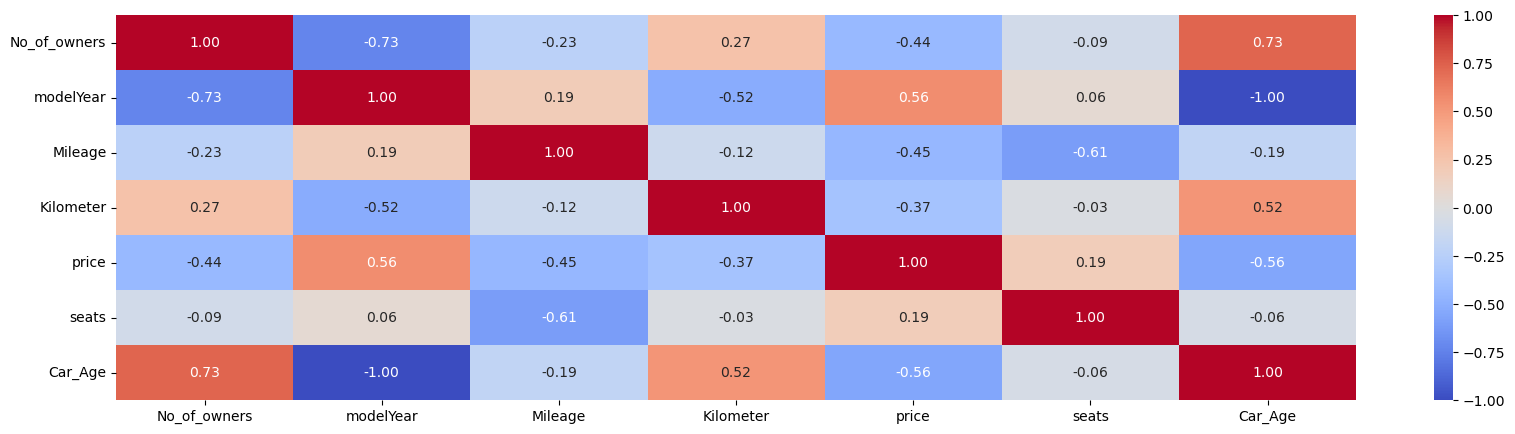

In [213]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [983]:
final_dfc

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,Price2,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,510000.0,5.0,Third Party insurance,kolkata,2
8365,Maruti,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000.0,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000.0,5.0,Third Party insurance,kolkata,13
8367,Maruti,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000.0,5.0,Third Party insurance,kolkata,12


In [215]:
final_dfc.to_csv('C:/Users/SG_LENOVO/Downloads/df_preprocess.csv',index= False)

In [217]:
final_dfc

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,510000.0,5.0,Third Party insurance,kolkata,2
8365,Maruti,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000.0,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000.0,5.0,Third Party insurance,kolkata,13
8367,Maruti,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000.0,5.0,Third Party insurance,kolkata,12


# EDA

In [220]:
final_dfc

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,510000.0,5.0,Third Party insurance,kolkata,2
8365,Maruti,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000.0,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000.0,5.0,Third Party insurance,kolkata,13
8367,Maruti,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000.0,5.0,Third Party insurance,kolkata,12


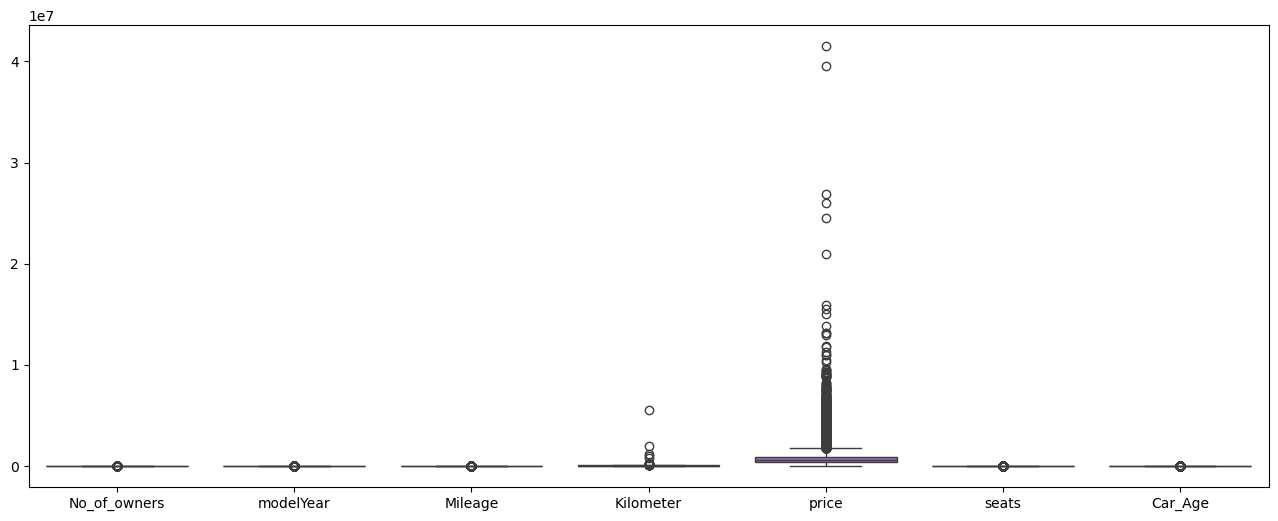

In [222]:
plt.figure(figsize=(16,6))
sns.boxplot(data=final_dfc)
plt.show()

# Observation
#Checking for outlier ->  Kilometer  outlier

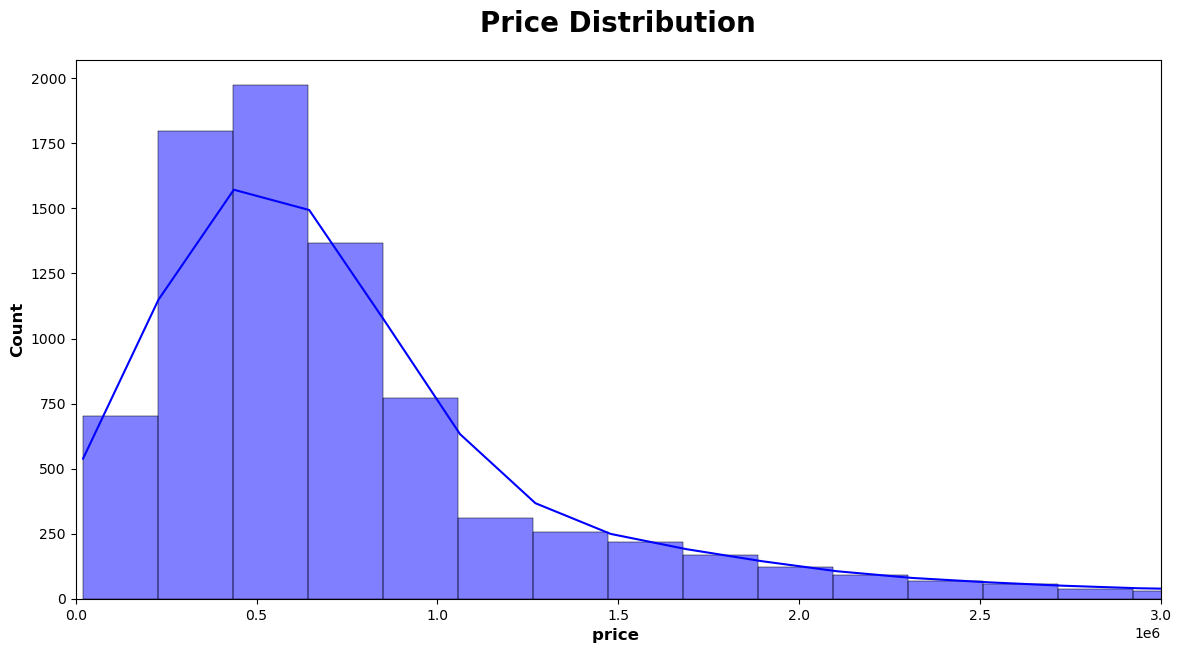

In [224]:
plt.subplots(figsize=(14,7))
sns.histplot(final_dfc.price, bins=200, kde=True, color = 'b')
plt.title("Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("price ", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

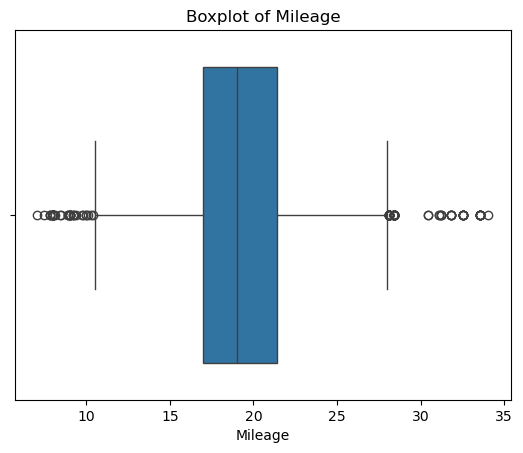

In [226]:
# Price Outlier Detection
sns.boxplot(data=final_dfc, x='Mileage')
plt.title('Boxplot of Mileage')
plt.show()


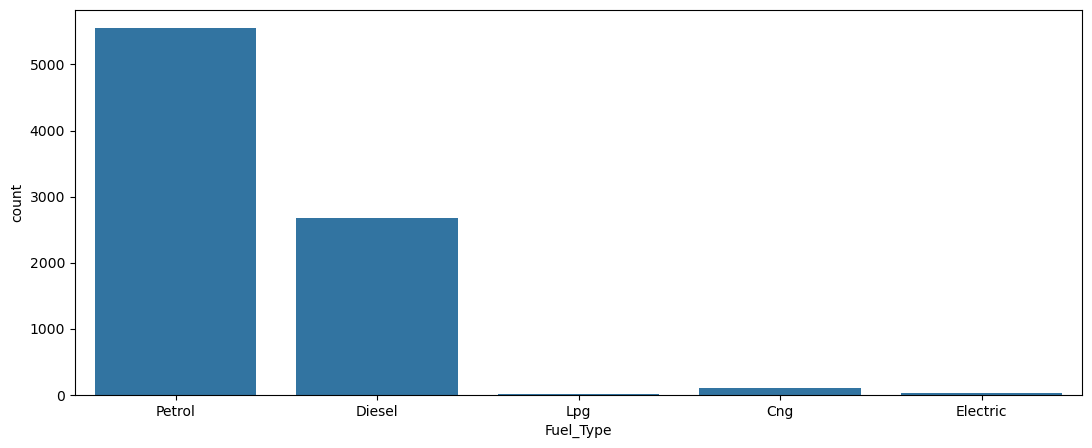

In [228]:
plt.figure(figsize = (13,5))
sns.countplot(data = final_dfc, x = 'Fuel_Type')
plt.show()  

# Huge number of cars based petrol fuel type

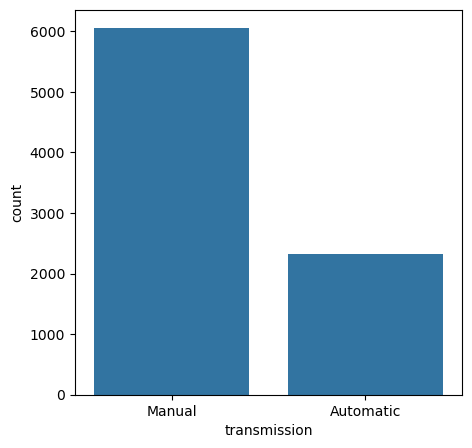

In [231]:
plt.figure(figsize = (5,5))
sns.countplot(data = final_dfc, x = 'transmission')
plt.show()  # highly available cars are manual

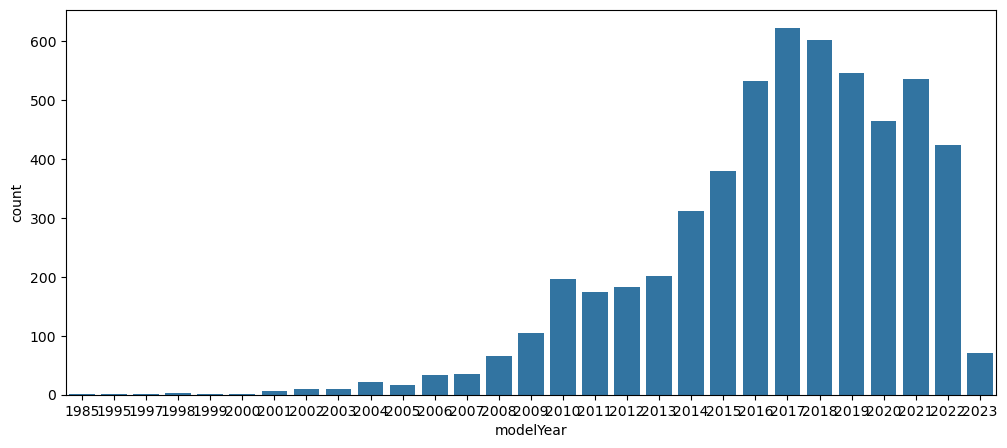

In [233]:
plt.figure(figsize =(12,5))      # only petrol type cars based on year count 
sns.countplot(data =final_dfc[final_dfc['Fuel_Type'] == 'Petrol'], x = 'modelYear')  # only petrol type cars high with 2017 modelyear
plt.show()

In [235]:
# Observation

# Petrol - High number of model belong to the year 2017

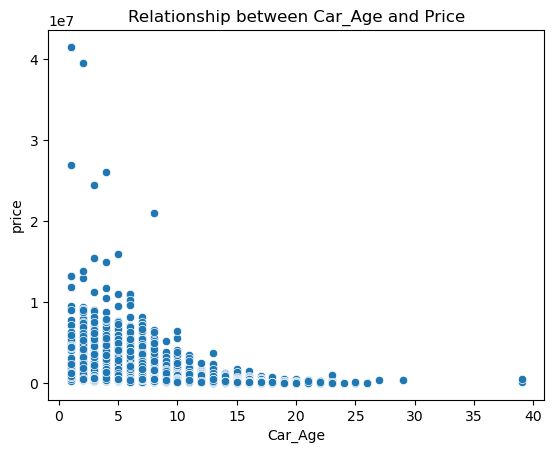

In [241]:
# Bivariate analysis to find the relationship between 
sns.scatterplot(data=final_dfc, x='Car_Age', y = 'price')
plt.title('Relationship between Car_Age and Price')
plt.show()

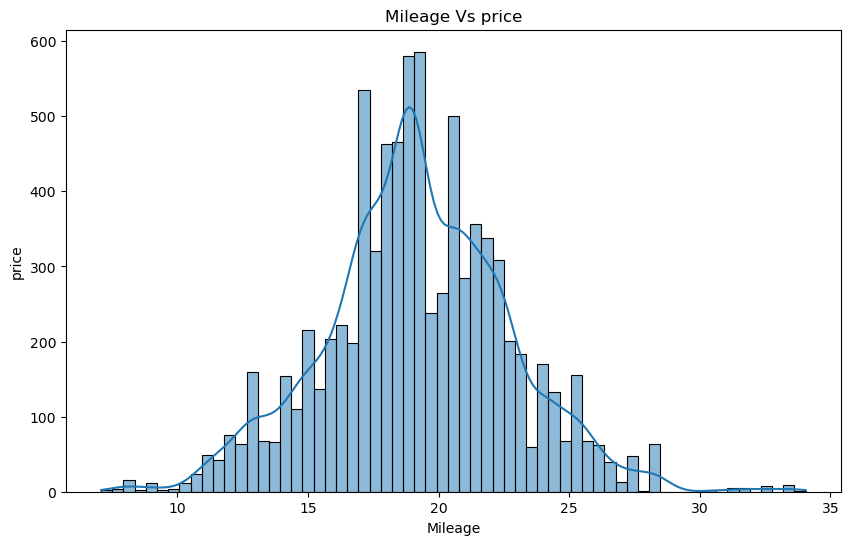

In [243]:
plt.figure(figsize=(10, 6))
sns.histplot(final_dfc['Mileage'], kde=True)
plt.title('Mileage Vs price')
plt.xlabel('Mileage')
plt.ylabel('price')
plt.show()

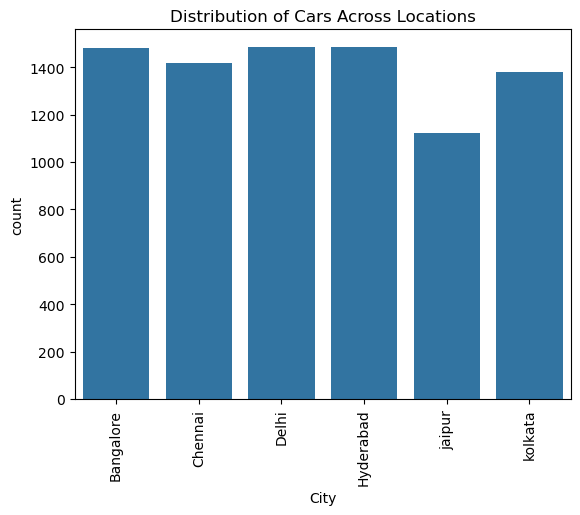

In [245]:
sns.countplot(data=final_dfc, x='City')
plt.title('Distribution of Cars Across Locations')
plt.xticks(rotation=90)
plt.show()


In [247]:
final_dfc["Body_Type"].value_counts()

Body_Type
Hatchback        3571
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [249]:
final_dfc["Body_Type"].isnull().sum()

0

In [251]:
final_dfc

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,510000.0,5.0,Third Party insurance,kolkata,2
8365,Maruti,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000.0,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000.0,5.0,Third Party insurance,kolkata,13
8367,Maruti,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000.0,5.0,Third Party insurance,kolkata,12


In [253]:
final_dfc.City.value_counts().index

Index(['Delhi', 'Hyderabad', 'Bangalore', 'Chennai', 'kolkata', 'jaipur'], dtype='object', name='City')

In [255]:
# Droping modelyear, carage ,modelyear same
final_dfc.drop(['modelYear'], axis =1, inplace = True) 

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\379813802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc.drop(['modelYear'], axis =1, inplace = True)


In [259]:
mr=final_dfc.get('Body_Type')
mrks=mr.tolist()
print(mrks)


['Hatchback', 'SUV', 'Hatchback', 'Sedan', 'SUV', 'SUV', 'Hatchback', 'SUV', 'Sedan', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'SUV', 'SUV', 'SUV', 'Hatchback', 'SUV', 'Sedan', 'Sedan', 'Hatchback', 'SUV', 'Hatchback', 'Sedan', 'Sedan', 'Hatchback', 'Hatchback', 'Sedan', 'SUV', 'Sedan', 'SUV', 'SUV', 'Sedan', 'Hatchback', 'MUV', 'Sedan', 'Hatchback', 'Sedan', 'SUV', 'SUV', 'Hatchback', 'Hatchback', 'Hatchback', 'Sedan', 'Sedan', 'Hatchback', 'SUV', 'Hatchback', 'Hatchback', 'SUV', 'Hatchback', 'Sedan', 'Hatchback', 'Hatchback', 'SUV', 'SUV', 'Hatchback', 'SUV', 'SUV', 'Hatchback', 'SUV', 'Hatchback', 'Hatchback', 'Sedan', 'SUV', 'Hatchback', 'SUV', 'SUV', 'Hatchback', 'Hatchback', 'Hatchback', 'Sedan', 'Sedan', 'Hatchback', 'MUV', 'Sedan', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Sedan', 'Hatchback', 'Sedan', 'Hatchback', 'Hatchback', 'SUV', 'Hatchback', 'SUV', 'Hatchback', 'Hatchback', 'Hatchback', 'Sedan', 'Sedan', 'SUV', 'SUV', 'Hatchback', 'Hatch

In [261]:
final_dfc['Body_Type'].nunique()

10

In [263]:
final_dfc.head()

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,Maruti,Hatchback,Manual,3,23.10,Petrol,120000.0,400000.0,5.0,Third Party insurance,Bangalore,9
1,Ford,SUV,Manual,2,17.00,Petrol,32706.0,811000.0,5.0,Comprehensive,Bangalore,6
2,Tata,Hatchback,Manual,1,23.84,Petrol,11949.0,585000.0,5.0,Comprehensive,Bangalore,6
3,Hyundai,Sedan,Manual,1,19.10,Petrol,17794.0,462000.0,5.0,Comprehensive,Bangalore,10
4,Maruti,SUV,Manual,1,23.65,Diesel,60000.0,790000.0,5.0,Third Party insurance,Bangalore,9


In [265]:
final_dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8369 non-null   object 
 1   Body_Type     8369 non-null   object 
 2   transmission  8369 non-null   object 
 3   No_of_owners  8369 non-null   int64  
 4   Mileage       8369 non-null   float64
 5   Fuel_Type     8369 non-null   object 
 6   Kilometer     8369 non-null   float64
 7   price         8369 non-null   float64
 8   seats         8369 non-null   float64
 9   Insurance     8369 non-null   object 
 10  City          8369 non-null   object 
 11  Car_Age       8369 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 784.7+ KB


# Label Encoding

In [267]:
le=LabelEncoder()

In [269]:
final_dfc.select_dtypes(include=["object"]).columns

Index(['model', 'Body_Type', 'transmission', 'Fuel_Type', 'Insurance', 'City'], dtype='object')

In [271]:
# changing all objects into integer
for i in final_dfc.select_dtypes(include=["object"]).columns:
    final_dfc[i]=le.fit_transform(final_dfc[i])

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\3212326571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc[i]=le.fit_transform(final_dfc[i])
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\3212326571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc[i]=le.fit_transform(final_dfc[i])
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\3212326571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [274]:
final_dfc

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,19,2,1,3,23.10,4,120000.0,400000.0,5.0,8,0,9
1,7,7,1,2,17.00,4,32706.0,811000.0,5.0,2,0,6
2,28,2,1,1,23.84,4,11949.0,585000.0,5.0,2,0,6
3,10,8,1,1,19.10,4,17794.0,462000.0,5.0,2,0,10
4,19,7,1,1,23.65,1,60000.0,790000.0,5.0,8,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,19,2,1,1,25.24,4,10000.0,510000.0,5.0,8,5,2
8365,19,2,1,1,22.74,4,120000.0,180000.0,5.0,8,5,10
8366,20,8,0,3,11.74,4,50000.0,550000.0,5.0,8,5,13
8367,19,2,1,1,18.50,4,40000.0,140000.0,5.0,8,5,12


In [276]:
#min-max scaler
mm =MinMaxScaler()
final_dfc[["Kilometer","Body_Type","model","Mileage","seats",'Insurance','Car_Age']]=mm.fit_transform(final_dfc[["Kilometer","Body_Type","model","Mileage","seats",'Insurance','Car_Age']])

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_15212\1119869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dfc[["Kilometer","Body_Type","model","Mileage","seats",'Insurance','Car_Age']]=mm.fit_transform(final_dfc[["Kilometer","Body_Type","model","Mileage","seats",'Insurance','Car_Age']])


In [278]:
final_dfc.head()

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,0.612903,0.222222,1,3,0.593993,4,0.021818,400000.0,0.5,0.888889,0,0.210526
1,0.225806,0.777778,1,2,0.367816,4,0.005947,811000.0,0.5,0.222222,0,0.131579
2,0.903226,0.222222,1,1,0.621431,4,0.002173,585000.0,0.5,0.222222,0,0.131579
3,0.322581,0.888889,1,1,0.445680,4,0.003235,462000.0,0.5,0.222222,0,0.236842
4,0.612903,0.777778,1,1,0.614386,1,0.010909,790000.0,0.5,0.888889,0,0.210526


In [280]:
final_dfc['Kilometer'].min()

0.0

In [282]:
final_dfc['Kilometer'].max()

1.0

In [284]:
final_dfc['Kilometer'].mean()

0.01072260044102152

In [286]:
final_dfc

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,0.612903,0.222222,1,3,0.593993,4,0.021818,400000.0,0.5,0.888889,0,0.210526
1,0.225806,0.777778,1,2,0.367816,4,0.005947,811000.0,0.5,0.222222,0,0.131579
2,0.903226,0.222222,1,1,0.621431,4,0.002173,585000.0,0.5,0.222222,0,0.131579
3,0.322581,0.888889,1,1,0.445680,4,0.003235,462000.0,0.5,0.222222,0,0.236842
4,0.612903,0.777778,1,1,0.614386,1,0.010909,790000.0,0.5,0.888889,0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.612903,0.222222,1,1,0.673341,4,0.001818,510000.0,0.5,0.888889,5,0.026316
8365,0.612903,0.222222,1,1,0.580645,4,0.021818,180000.0,0.5,0.888889,5,0.236842
8366,0.645161,0.888889,0,3,0.172785,4,0.009091,550000.0,0.5,0.888889,5,0.315789
8367,0.612903,0.222222,1,1,0.423433,4,0.007273,140000.0,0.5,0.888889,5,0.289474


In [290]:
def outliers(final_dfc,column):
    q1=final_dfc[column].quantile(0.25)
    q3=final_dfc[column].quantile(0.75)
    IQR = q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return final_dfc[(final_dfc[column]>=lower)&(final_dfc[column]<=upper)]
kilo =outliers(final_dfc,"Kilometer")
price=outliers(kilo,"price")
final_dfc=price

In [292]:
final_dfc

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,0.612903,0.222222,1,3,0.593993,4,0.021818,400000.0,0.5,0.888889,0,0.210526
1,0.225806,0.777778,1,2,0.367816,4,0.005947,811000.0,0.5,0.222222,0,0.131579
2,0.903226,0.222222,1,1,0.621431,4,0.002173,585000.0,0.5,0.222222,0,0.131579
3,0.322581,0.888889,1,1,0.445680,4,0.003235,462000.0,0.5,0.222222,0,0.236842
4,0.612903,0.777778,1,1,0.614386,1,0.010909,790000.0,0.5,0.888889,0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.612903,0.222222,1,1,0.673341,4,0.001818,510000.0,0.5,0.888889,5,0.026316
8365,0.612903,0.222222,1,1,0.580645,4,0.021818,180000.0,0.5,0.888889,5,0.236842
8366,0.645161,0.888889,0,3,0.172785,4,0.009091,550000.0,0.5,0.888889,5,0.315789
8367,0.612903,0.222222,1,1,0.423433,4,0.007273,140000.0,0.5,0.888889,5,0.289474


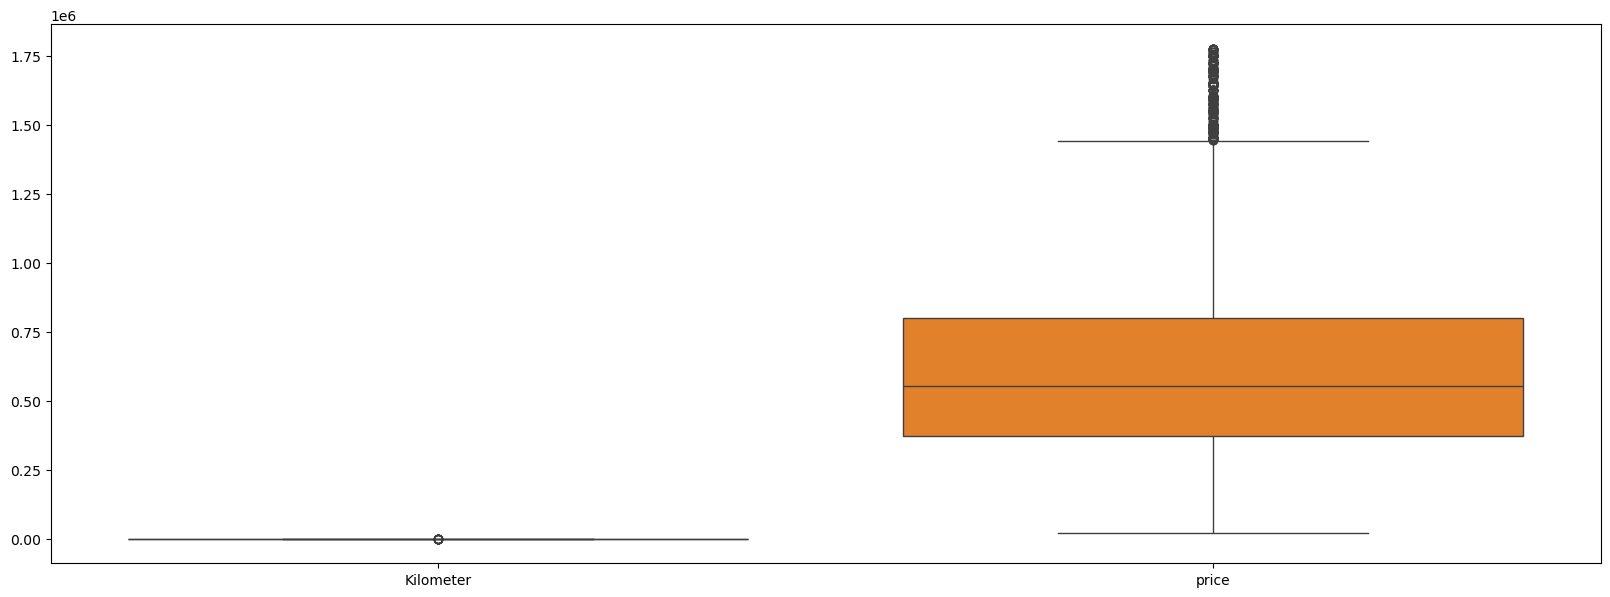

In [298]:
plt.figure(figsize=(20,7))
sns.boxplot(data=final_dfc[["Kilometer","price"]])
plt.show()

In [300]:
final_dfc[["Kilometer","price"]].describe()

,Kilometer,price
count,7447.000000,7.447000e+03
mean,0.010737,6.281798e+05
std,0.005988,3.586133e+05
min,0.000000,2.016100e+04
25%,0.005981,3.720000e+05
50%,0.010182,5.540000e+05
75%,0.014545,8.000000e+05
max,0.028169,1.775000e+06


# ML Model

In [302]:
final_dfc

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,price,seats,Insurance,City,Car_Age
0,0.612903,0.222222,1,3,0.593993,4,0.021818,400000.0,0.5,0.888889,0,0.210526
1,0.225806,0.777778,1,2,0.367816,4,0.005947,811000.0,0.5,0.222222,0,0.131579
2,0.903226,0.222222,1,1,0.621431,4,0.002173,585000.0,0.5,0.222222,0,0.131579
3,0.322581,0.888889,1,1,0.445680,4,0.003235,462000.0,0.5,0.222222,0,0.236842
4,0.612903,0.777778,1,1,0.614386,1,0.010909,790000.0,0.5,0.888889,0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.612903,0.222222,1,1,0.673341,4,0.001818,510000.0,0.5,0.888889,5,0.026316
8365,0.612903,0.222222,1,1,0.580645,4,0.021818,180000.0,0.5,0.888889,5,0.236842
8366,0.645161,0.888889,0,3,0.172785,4,0.009091,550000.0,0.5,0.888889,5,0.315789
8367,0.612903,0.222222,1,1,0.423433,4,0.007273,140000.0,0.5,0.888889,5,0.289474


In [304]:
var=final_dfc.drop('price', axis =1)
tar = final_dfc['price']

In [306]:
fs= RandomForestRegressor(n_estimators=600,random_state=63)

In [308]:
# train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=45)

In [310]:
fs.fit(var,tar)

RandomForestRegressor(n_estimators=600, random_state=63)

In [311]:
fs.feature_importances_

array([0.0747773 , 0.26755071, 0.07331106, 0.00696633, 0.13066754,
       0.03992547, 0.03927682, 0.01249354, 0.00788174, 0.03457735,
       0.31257215])

In [312]:
fs_score=pd.DataFrame({
    "columns":var.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False).head(11)

In [313]:
fs_score

,columns,score
10,Car_Age,0.312572
1,Body_Type,0.267551
4,Mileage,0.130668
0,model,0.074777
2,transmission,0.073311
5,Fuel_Type,0.039925
6,Kilometer,0.039277
9,City,0.034577
7,seats,0.012494
8,Insurance,0.007882


In [314]:
list(fs_score.sort_values("score",ascending=False).head(11)["columns"].values)

['Car_Age',
 'Body_Type',
 'Mileage',
 'model',
 'transmission',
 'Fuel_Type',
 'Kilometer',
 'City',
 'seats',
 'Insurance',
 'No_of_owners']

In [315]:
selected_features =list(fs_score.sort_values("score",ascending=False).head(11)["columns"].values)

In [316]:
var = var[selected_features]

In [317]:
var

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.210526,0.222222,0.593993,0.612903,1,4,0.021818,0,0.5,0.888889,3
1,0.131579,0.777778,0.367816,0.225806,1,4,0.005947,0,0.5,0.222222,2
2,0.131579,0.222222,0.621431,0.903226,1,4,0.002173,0,0.5,0.222222,1
3,0.236842,0.888889,0.445680,0.322581,1,4,0.003235,0,0.5,0.222222,1
4,0.210526,0.777778,0.614386,0.612903,1,1,0.010909,0,0.5,0.888889,1
...,...,...,...,...,...,...,...,...,...,...,...
8364,0.026316,0.222222,0.673341,0.612903,1,4,0.001818,5,0.5,0.888889,1
8365,0.236842,0.222222,0.580645,0.612903,1,4,0.021818,5,0.5,0.888889,1
8366,0.315789,0.888889,0.172785,0.645161,0,4,0.009091,5,0.5,0.888889,3
8367,0.289474,0.222222,0.423433,0.612903,1,4,0.007273,5,0.5,0.888889,1


In [318]:
tar

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 7447, dtype: float64

In [319]:
data = var.corr()

In [320]:
data.corr()

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
Car_Age,1.000000,-0.020925,-0.360540,-0.360488,0.072302,-0.231307,0.754340,-0.187744,0.001648,0.087408,0.638313
Body_Type,-0.020925,1.000000,-0.502562,-0.129186,-0.384299,-0.399536,0.168871,-0.013433,0.250742,0.050092,-0.004860
Mileage,-0.360540,-0.502562,1.000000,0.147636,0.327258,-0.144991,-0.159103,0.055184,-0.411287,-0.114783,-0.300682
model,-0.360488,-0.129186,0.147636,1.000000,-0.086278,-0.076051,-0.192671,-0.090234,0.181385,-0.057576,-0.271645
transmission,0.072302,-0.384299,0.327258,-0.086278,1.000000,-0.081968,0.046288,0.029937,-0.045325,-0.056279,-0.108435
Fuel_Type,-0.231307,-0.399536,-0.144991,-0.076051,-0.081968,1.000000,-0.619873,-0.025950,-0.437648,-0.164251,-0.164804
Kilometer,0.754340,0.168871,-0.159103,-0.192671,0.046288,-0.619873,1.000000,-0.221137,0.163866,0.148288,0.482639
City,-0.187744,-0.013433,0.055184,-0.090234,0.029937,-0.025950,-0.221137,1.000000,-0.029140,-0.061981,-0.292549
seats,0.001648,0.250742,-0.411287,0.181385,-0.045325,-0.437648,0.163866,-0.029140,1.000000,0.008444,0.008014
Insurance,0.087408,0.050092,-0.114783,-0.057576,-0.056279,-0.164251,0.148288,-0.061981,0.008444,1.000000,0.143525


In [321]:
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=45)

In [322]:
train_data.shape

(5957, 11)

In [323]:
test_data.shape

(1490, 11)

In [338]:
# Linear regression

In [340]:
model=LinearRegression() 

In [342]:
model.fit(train_data,train_lab)

LinearRegression()

In [344]:
predicting_value=model.predict(test_data)

In [346]:
predicting_value

array([619001.15300114, 410654.83653728, 652041.54862525, ...,
       343601.88872455, 457153.9975101 , 840394.78285072])

In [348]:
predict_train = model.predict(train_data)

In [350]:
mean_squared_error(train_lab,predict_train)

42961881733.28024

In [352]:
mean_absolute_error(train_lab,predict_train)

152359.9230377752

In [354]:
r2_score(train_lab,predict_train)

0.6686807195570529

In [356]:
print(f"mean_squared_error:{mean_squared_error(train_lab,predict_train)}")
print(f"mean_absolute_error:{mean_absolute_error(train_lab,predict_train)}")
print(f"r2_score:{r2_score(train_lab,predict_train)}")

mean_squared_error:42961881733.28024
mean_absolute_error:152359.9230377752
r2_score:0.6686807195570529


In [357]:
predict_test = model.predict(test_data)

In [360]:
mean_squared_error(test_lab,predict_test)

37753266728.05728

In [362]:
mean_absolute_error(test_lab,predict_test)

147407.20298220956

In [364]:
r2_score(test_lab,predict_test)

0.695906224498224

In [366]:
print(f"mean_squared_error:{mean_squared_error(test_lab,predict_test)}")
print(f"mean_absolute_error:{mean_absolute_error(test_lab,predict_test)}")
print(f"r2_score:{r2_score(test_lab,predict_test)}")

mean_squared_error:37753266728.05728
mean_absolute_error:147407.20298220956
r2_score:0.695906224498224


In [368]:
metrics = {
    "mean squared error":[mean_squared_error(train_lab,predict_train), mean_squared_error(test_lab,predict_test)],
    "mean absolute error":[mean_absolute_error(train_lab,predict_train), mean_absolute_error(test_lab,predict_test)],
    "r2 score":[r2_score(train_lab,predict_train), r2_score(test_lab,predict_test)],
}

In [370]:
Linear_regression=pd.DataFrame(metrics,index=["Training","Testing"])

In [372]:
Linear_regression

,mean squared error,mean absolute error,r2 score
Training,4.296188e+10,152359.923038,0.668681
Testing,3.775327e+10,147407.202982,0.695906


In [374]:
reg_model=pd.DataFrame({
    "actual price":test_lab,
    "predicted price":predicting_value
})

In [376]:
reg_model.head()

,actual price,predicted price
3508,380000.0,619001.153001
1250,485000.0,410654.836537
1864,560000.0,652041.548625
1372,924000.0,904925.030541
5117,290000.0,173215.496256


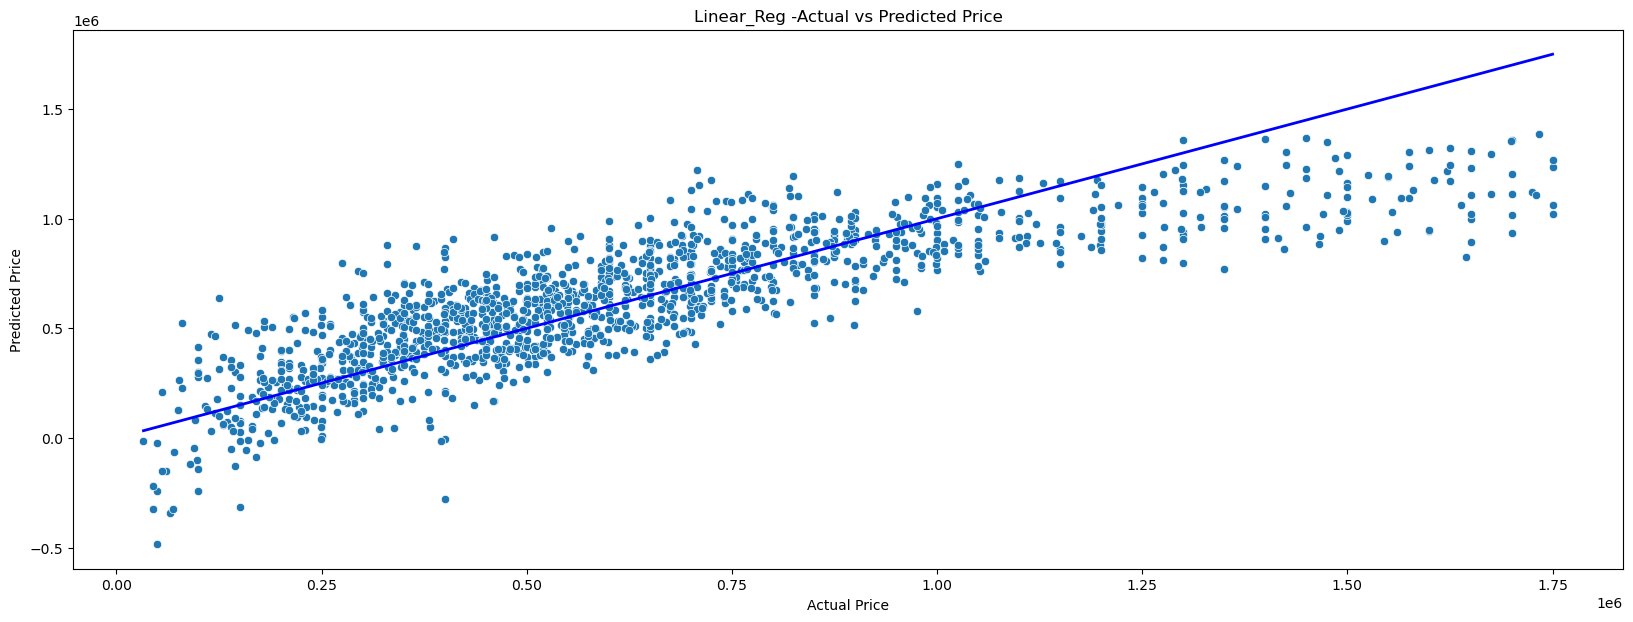

In [378]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=predicting_value)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear_Reg -Actual vs Predicted Price")
plt.show()

In [379]:
# Lasso model

In [382]:
lasso_model= Lasso(alpha=0.01)

In [384]:
lasso_model.fit(train_data,train_lab)

Lasso(alpha=0.01)

In [386]:
lasso_train_predict= lasso_model.predict(train_data)
lasso_test_predict= lasso_model.predict(test_data)

In [388]:
mean_squared_error(train_lab,lasso_train_predict)

42961881737.662834

In [390]:
mean_squared_error(test_lab,lasso_test_predict)

37753249136.43226

In [392]:
mean_absolute_error(train_lab,lasso_train_predict)

152359.86768209285

In [394]:
mean_absolute_error(test_lab,lasso_test_predict)

147407.06369856175

In [396]:
r2_score(train_lab,lasso_train_predict)

0.6686807195232546

In [398]:
r2_score(test_lab,lasso_test_predict)

0.6959063661946687

In [400]:
# Ridge

In [402]:
ridge_model= Ridge(alpha=0.0099)
ridge_model.fit(train_data,train_lab)

Ridge(alpha=0.0099)

In [404]:
ridge_train_predict =ridge_model.predict(train_data)
ridge_test_predict =ridge_model.predict(test_data)

In [406]:
mean_squared_error(train_lab,ridge_train_predict)

42964638267.11072

In [407]:
mean_squared_error(test_lab,ridge_test_predict)

37743080362.73269

In [408]:
mean_absolute_error(train_lab,ridge_train_predict)

152330.0002329709

In [410]:
mean_absolute_error(test_lab,ridge_test_predict)

147320.80959386873

In [414]:
r2_score(train_lab,ridge_train_predict)

0.6686594613446938

In [416]:
r2_score(test_lab,ridge_test_predict)

0.695988273299789

# Random forest

In [419]:
var.head()

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.210526,0.222222,0.593993,0.612903,1,4,0.021818,0,0.5,0.888889,3
1,0.131579,0.777778,0.367816,0.225806,1,4,0.005947,0,0.5,0.222222,2
2,0.131579,0.222222,0.621431,0.903226,1,4,0.002173,0,0.5,0.222222,1
3,0.236842,0.888889,0.445680,0.322581,1,4,0.003235,0,0.5,0.222222,1
4,0.210526,0.777778,0.614386,0.612903,1,1,0.010909,0,0.5,0.888889,1


In [421]:
model=RandomForestRegressor(n_estimators=300,max_depth=100,random_state=47)

In [423]:
model=RandomForestRegressor(n_estimators=300,max_depth=100,random_state=63)

In [425]:
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=47)

In [427]:
train_data.shape

(5957, 11)

In [429]:
test_data.shape

(1490, 11)

In [431]:
random_model = model.fit(train_data,train_lab)

In [432]:
random_model 

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=63)

In [433]:
random_train_predict = random_model.predict(train_data)
random_test_predict = random_model.predict(test_data)

In [434]:
mean_squared_error(train_lab,random_train_predict)

2271096163.6928153

In [435]:
mean_squared_error(test_lab,random_test_predict)

18360128980.424236

In [436]:
mean_absolute_error(train_lab,random_train_predict)

30870.427892941745

In [437]:
mean_absolute_error(test_lab,random_test_predict)

89760.53553559889

In [438]:
r2_score(train_lab,random_train_predict)

0.9820152667904429

In [439]:
r2_score(test_lab,random_test_predict)

0.8666461444340068

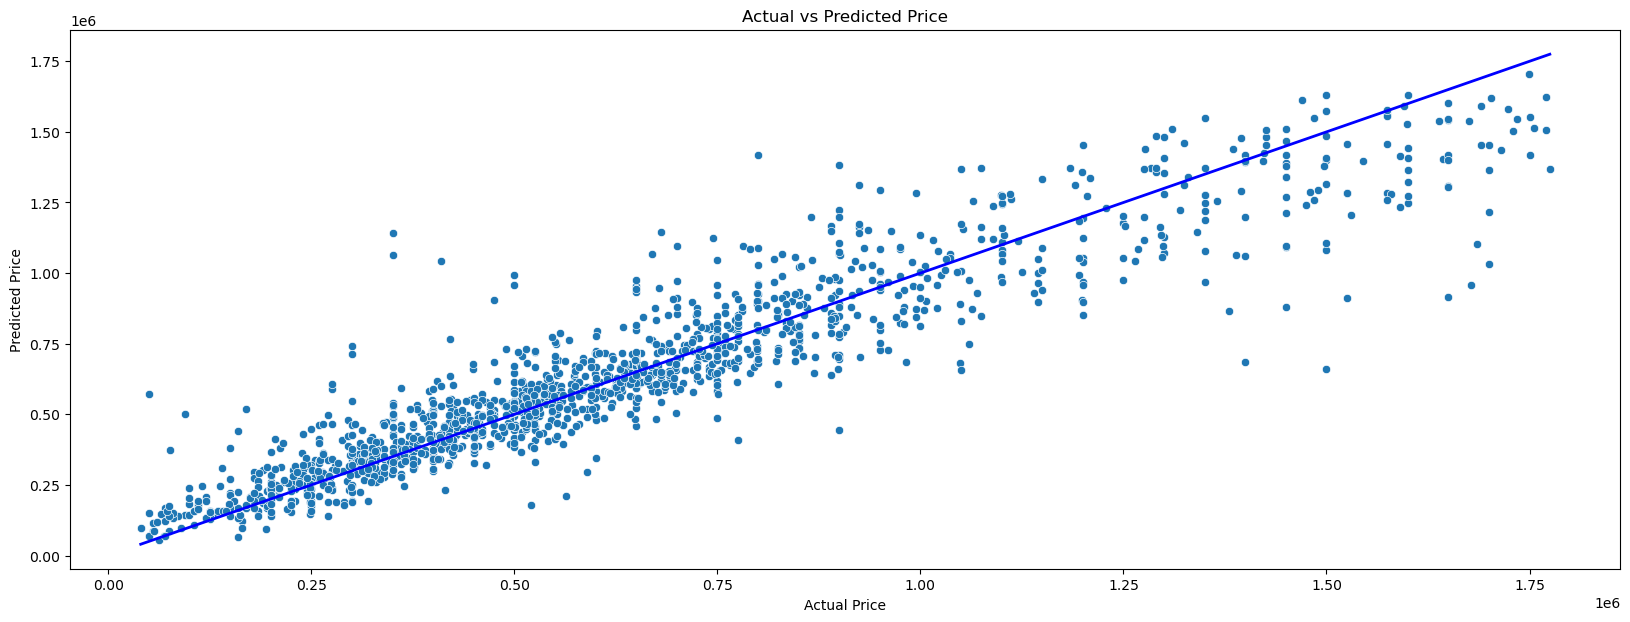

In [440]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=random_test_predict)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [1269]:
# Decison Tree Regressor

In [1271]:
var.head()

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.210526,0.222222,0.593993,0.612903,1,4,0.021818,0,0.5,0.888889,3
1,0.131579,0.777778,0.367816,0.225806,1,4,0.005947,0,0.5,0.222222,2
2,0.131579,0.222222,0.621431,0.903226,1,4,0.002173,0,0.5,0.222222,1
3,0.236842,0.888889,0.445680,0.322581,1,4,0.003235,0,0.5,0.222222,1
4,0.210526,0.777778,0.614386,0.612903,1,1,0.010909,0,0.5,0.888889,1


In [1273]:
tar.head()

0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: Price2, dtype: float64

In [1275]:
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=35)

In [1277]:
train_data.shape

(5957, 11)

In [1279]:
test_data.shape

(1490, 11)

In [1281]:
dt_model= DecisionTreeRegressor(max_depth=5,random_state=35)

In [1283]:
dt_model.fit(train_data,train_lab)

DecisionTreeRegressor(max_depth=5, random_state=35)

In [1284]:
dttrain_predict = dt_model.predict(train_data)

In [1285]:
dttest_predict = dt_model.predict(test_data)

In [1289]:
mean_squared_error(train_lab,dttrain_predict)

40354923768.04078

In [1290]:
mean_squared_error(test_lab,dttest_predict)

41724145276.14438

In [1293]:
mean_absolute_error(train_lab,dttrain_predict)

144514.4930778694

In [1295]:
mean_absolute_error(test_lab,dttest_predict)

145214.63913247045

In [1297]:
r2_score(train_lab,dttrain_predict)

0.6872850608791486

In [1299]:
r2_score(test_lab,dttest_predict)

0.6707997868988826

In [1301]:
# Gradient boosting

In [1303]:
var.head()

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.210526,0.222222,0.593993,0.612903,1,4,0.021818,0,0.5,0.888889,3
1,0.131579,0.777778,0.367816,0.225806,1,4,0.005947,0,0.5,0.222222,2
2,0.131579,0.222222,0.621431,0.903226,1,4,0.002173,0,0.5,0.222222,1
3,0.236842,0.888889,0.445680,0.322581,1,4,0.003235,0,0.5,0.222222,1
4,0.210526,0.777778,0.614386,0.612903,1,1,0.010909,0,0.5,0.888889,1


In [1305]:
tar.head()

0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: Price2, dtype: float64

In [1307]:
gb= GradientBoostingRegressor()

In [1309]:
gb.fit(train_data,train_lab)

GradientBoostingRegressor()

In [1310]:
gb_train_predict=gb.predict(train_data)
gb_test_predict=gb.predict(test_data)

In [1313]:
Gradient_boost=pd.DataFrame(metrics,index=["training","testing"])

In [1315]:
Gradient_boost

,mean squared error,mean absolute error,r2 score
training,4.296188e+10,152359.923038,0.668681
testing,3.775327e+10,147407.202982,0.695906


# Extra tree

In [1318]:
var.head()

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.210526,0.222222,0.593993,0.612903,1,4,0.021818,0,0.5,0.888889,3
1,0.131579,0.777778,0.367816,0.225806,1,4,0.005947,0,0.5,0.222222,2
2,0.131579,0.222222,0.621431,0.903226,1,4,0.002173,0,0.5,0.222222,1
3,0.236842,0.888889,0.445680,0.322581,1,4,0.003235,0,0.5,0.222222,1
4,0.210526,0.777778,0.614386,0.612903,1,1,0.010909,0,0.5,0.888889,1


In [1320]:
tar.head()

0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: Price2, dtype: float64

In [1322]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(max_depth=20, random_state=100)


In [1324]:
train_data,test_data,train_lab,test_lab=train_test_split(var,tar,test_size=0.2,random_state=100)


In [1326]:
et_model = ExtraTreesRegressor(random_state=70).fit(train_data, train_lab)

In [1327]:
et_model 

ExtraTreesRegressor(random_state=70)

In [1328]:
ettrain_pred = et_model.predict(train_data) 

In [1329]:
ettest_pred=et_model.predict(test_data) 

In [1330]:
mean_squared_error(train_lab,ettrain_pred)

71665943.55100442

In [1331]:
mean_squared_error(test_lab,ettest_pred)

17816902262.89708

In [1333]:
mean_absolute_error(train_lab,ettrain_pred)

752.7995075821165

In [1335]:
mean_absolute_error(test_lab,ettest_pred)

87406.1460246085

In [1340]:
r2_score(train_lab,ettrain_pred)

0.9994441958713562

In [1344]:
r2_score(test_lab,ettest_pred)

0.859805609530987

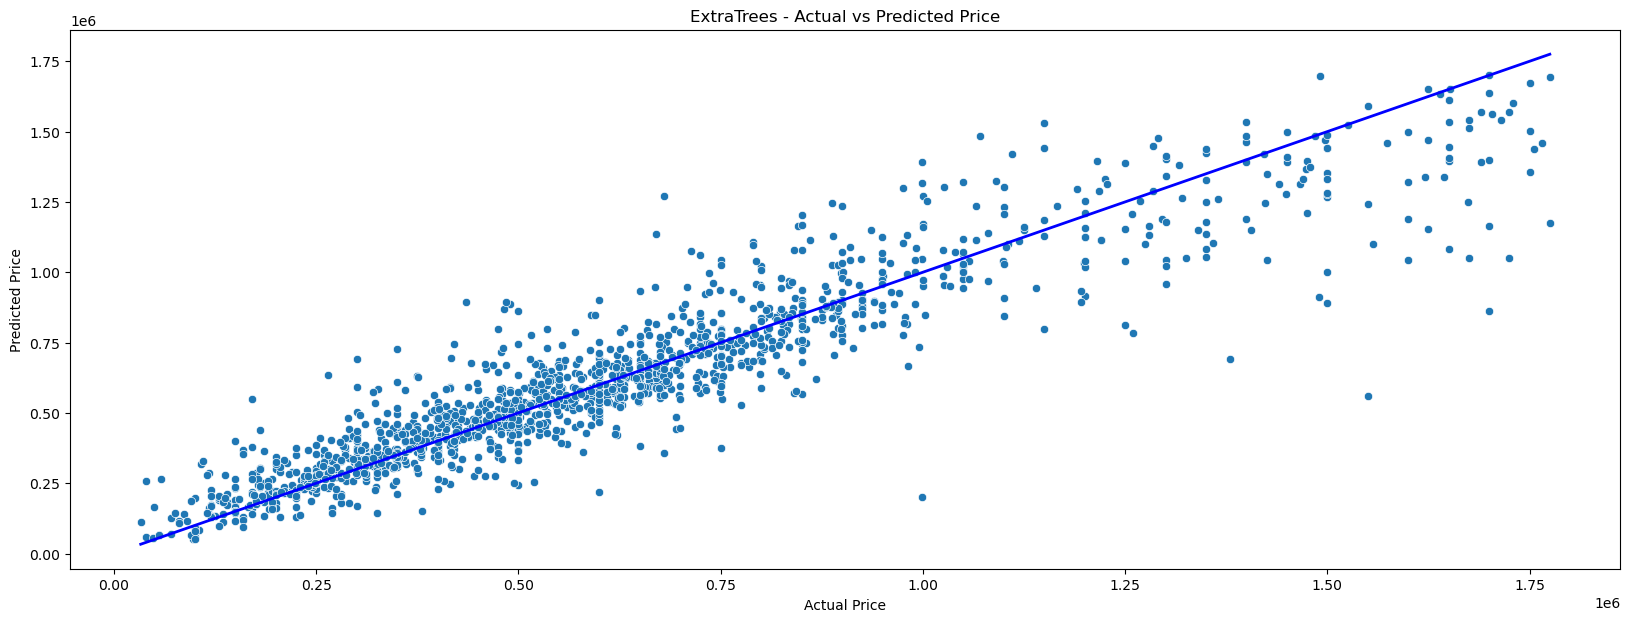

In [1346]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=test_lab,y=ettest_pred)
plt.plot([test_lab.min(),test_lab.max()],[test_lab.min(),test_lab.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("ExtraTrees - Actual vs Predicted Price")
plt.show()

# Save model

In [1817]:
filename='random_model'
pickle.dump(model,open(filename,'wb'))

# Random forest

In [623]:
# Initialize

In [455]:
 
with open('random_forest.pkl','wb') as file:
    pickle.dump(random_model,file)

In [1832]:
# Load model

In [475]:
filename ='random_forest.pkl'
pickle.dump(random_model,open(filename, 'wb'))

In [463]:

with open(r"C:\Users\SG_LENOVO\Downloads\random_forest.pkl", 'rb') as s:
    trained_model = pickle.load(s)

In [465]:
trained_model 

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=63)

In [467]:
trained_model.predict(final_dfc.loc[[1879]].drop('price', axis = 1).values) # Instead of line 84 to 86 , we can do this method

C:\Users\SG_LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1105138.92857143])

In [ ]:
# load using pandas

In [469]:
m1 = pd.read_pickle("random_forest.pkl")

In [471]:
m1.predict(final_dfc.loc[[1879]].drop('price', axis =1).values)

C:\Users\SG_LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1105138.92857143])

In [ ]:
##########

In [1770]:
predict=trained_model.predict(train_data)

In [1772]:
predict

array([ 974636.66666667,  397463.33333333,  853200.        , ...,
       1010133.33333333,  494670.        ,  620130.        ])

In [1776]:
train_data.head(1)

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
4471,0.052632,0.777778,0.368928,0.935484,1,4,0.009818,3,0.5,0.222222,2


In [1808]:
rf_final=pd.DataFrame(
    [[0.0532,	0.778,0.368928,0.5484,0,4,0.0018,3,0.5,0.222222,3]],
    columns=['Car_Age',	'Body_Type','Mileage','model','transmission','Fuel_Type','Kilometer','City','seats','Insurance','No_of_owners'])

In [1810]:
trained_model.predict(rf_final)

array([1275441.88888889])

In [ ]:
#################################################

In [ ]:
model1.predict(final_dfc.loc[[1324]].drop('Price2', axis = 1).values)

In [687]:
df_cd1.loc[[1324]].drop('Price1', axis = 1).values

array([[0.84394904, 0.77777778, 1.        , 2.        , 0.36781609,
        4.        , 0.00836364, 0.5       , 0.22222222, 0.        ,
        0.15789474]])

In [689]:
m1 = pd.read_pickle("rf.pkl")

In [690]:
m1.predict(df_cd1.loc[[1324]].drop('Price1', axis = 1).values)

C:\Users\SG_LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([554618.04857143])

In [753]:
model1

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=47)

In [ ]:
#########

In [1364]:
predict=model1.predict(train_data)

In [1366]:
predict

array([ 390880.98444444, 1212939.98666667,  539816.65      , ...,
        275564.15      ,  879374.41444444, 1013440.53888889])

In [1368]:
train_data.head(1)

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
7363,0.105263,0.222222,0.62551,0.612903,1,4,0.005598,5,0.5,0.222222,2


In [1370]:
rf_final=pd.DataFrame(
    [[0.105263,0.222222,0.62551,0.496815,1,2,0.009598,5,0.5,0.222222,1]],
    columns=['Car_Age',	'Body_Type','Mileage','model','transmission','Fuel_Type','Kilometer','City','seats','Insurance','No_of_owners'])


In [1372]:
rf_final

,Car_Age,Body_Type,Mileage,model,transmission,Fuel_Type,Kilometer,City,seats,Insurance,No_of_owners
0,0.105263,0.222222,0.62551,0.496815,1,2,0.009598,5,0.5,0.222222,1


In [1374]:
model1.predict(rf_final)

array([536253.33])

In [1376]:
##############

In [1394]:
pk.dump(model1,open('model1.pkl','wb'))

In [ ]:
####################33

In [1380]:
final_dfc.loc[[7363]]

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,Price2,seats,Insurance,City,Car_Age
7363,0.612903,0.222222,1,2,2019,0.62551,4,0.005598,323000.0,0.5,0.222222,5,0.105263


In [653]:
data1 =pd.read_csv('C:/Users/SG_LENOVO/Downloads/df_cardheko.csv',index_col=False)

In [655]:
data1

,model,Body_Type,transmission,No_of_owners,Mileage,Fuel_Type,Kilometer,Price1,seats,Insurance,City,Car_Age
0,0.509554,0.222222,1,3,0.593993,4,0.021818,400000,0.5,0.888889,0,0.210526
1,0.159236,0.777778,1,2,0.367816,4,0.005947,811000,0.5,0.222222,0,0.131579
2,0.869427,0.222222,1,1,0.621431,4,0.002173,585000,0.5,0.222222,0,0.131579
3,0.277070,0.888889,1,1,0.445680,4,0.003235,462000,0.5,0.222222,0,0.236842
4,0.566879,0.777778,1,1,0.614386,1,0.010909,790000,0.5,0.888889,0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...
7442,0.509554,0.222222,1,1,0.673341,4,0.001818,509999,0.5,0.888889,5,0.026316
7443,0.493631,0.222222,1,1,0.580645,4,0.021818,180000,0.5,0.888889,5,0.236842
7444,0.627389,0.888889,0,3,0.172785,4,0.009091,550000,0.5,0.888889,5,0.315789
7445,0.557325,0.222222,1,1,0.423433,4,0.007273,140000,0.5,0.888889,5,0.289474


In [ ]:
# Before label encoding

In [657]:
df_ch.to_csv('C:/Users/SG_LENOVO/Downloads/df_preprocess.csv',index= False)

In [659]:
df_ch

,model,Body_Type,transmission,No_of_owners,modelYear,Mileage,Fuel_Type,Kilometer,Price1,seats,Insurance,City,Car_Age
0,Maruti Celerio,Hatchback,Manual,3,2015,23.10,Petrol,120000.0,400000,5.0,Third Party insurance,Bangalore,9
1,Ford Ecosport,SUV,Manual,2,2018,17.00,Petrol,32706.0,811000,5.0,Comprehensive,Bangalore,6
2,Tata Tiago,Hatchback,Manual,1,2018,23.84,Petrol,11949.0,585000,5.0,Comprehensive,Bangalore,6
3,Hyundai Xcent,Sedan,Manual,1,2014,19.10,Petrol,17794.0,462000,5.0,Comprehensive,Bangalore,10
4,Maruti SX4 S Cross,SUV,Manual,1,2015,23.65,Diesel,60000.0,790000,5.0,Third Party insurance,Bangalore,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti Celerio,Hatchback,Manual,1,2022,25.24,Petrol,10000.0,509999,5.0,Third Party insurance,kolkata,2
8365,Maruti Alto 800,Hatchback,Manual,1,2014,22.74,Petrol,120000.0,180000,5.0,Third Party insurance,kolkata,10
8366,Mercedes-Benz C-Class,Sedan,Automatic,3,2011,11.74,Petrol,50000.0,550000,5.0,Third Party insurance,kolkata,13
8367,Maruti Ritz,Hatchback,Manual,1,2012,18.50,Petrol,40000.0,140000,5.0,Third Party insurance,kolkata,12
